# Dynamic Time Warping

***

In [136]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sbn


from scipy.spatial.distance import euclidean
from dtw import dtw

# Calculando DTW

Uma implementação abrangente de algoritmos de DTW. O DTW calcula o alinhamento ideal (menor distância cumulativa) entre os pontos de duas séries temporais.

In [137]:
#https://pypi.org/project/dtw-python/
#!pip install dtw-python

In [138]:
# Vamos analisar um exemplo simples 

#criando duas sequências
x = [3, 1, 2, 2, 1]
y = [2, 0, 0, 3, 3, 1, 0]

In [139]:
dtw_result = dtw(x, y, keep_internals=True, dist_method=euclidean)

print("Distância %.3f"% dtw_result.distance)

Distância 9.000


Neste exemplo, usaremos dois sinais senoidais e calcularemos a distância DTW entre eles para ver como eles serão correspondidos.

In [140]:
time1 = np.linspace(start=0, stop=1, num=50)
time2 = time1[0:40]

x1 = np.array(3 * np.sin(np.pi * time1) + 1.5 * np.sin(4*np.pi * time1))
x2 =  np.array(3 * np.sin(np.pi * time2 + 0.5) + 1.5 * np.sin(4*np.pi * time2 + 0.5))

print(x1.shape)
print(x2.shape)

(50,)
(40,)


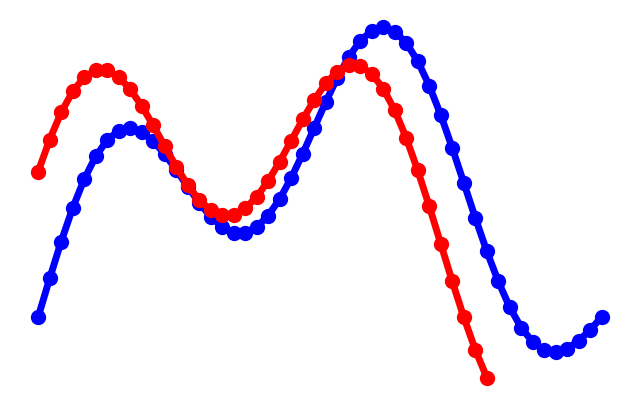

In [141]:
fig, ax = plt.subplots(figsize=(8, 5))

fig.patch.set_visible(True)
ax.axis('off')

ax.plot(x1, color='blue', marker='o', markersize=10, linewidth=5)
ax.plot(x2, color='red', marker='o', markersize=10, linewidth=5)
ax.tick_params(axis="both", which="major", labelsize=18)

In [142]:
dtw_result = dtw(x1, x2, keep_internals=True, dist_method=euclidean)

print("Distância %.3f"% dtw_result.distance)

Distância 20.654


In [143]:
# Matrix de custo 
cost_matrix = dtw_result.costMatrix

# Caminho x e y
path_x = dtw_result.index1
path_y = dtw_result.index2


<Axes: xlabel='Query index', ylabel='Reference index'>

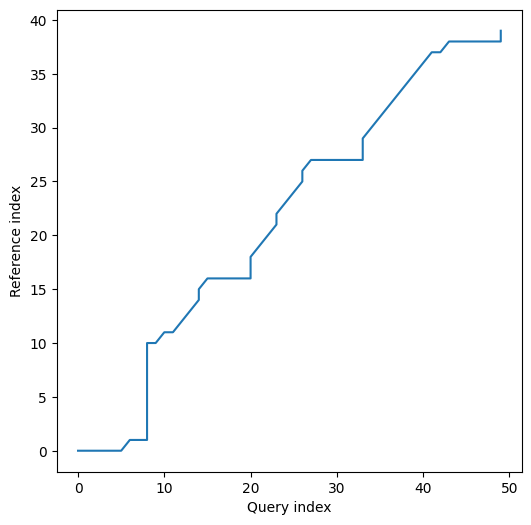

In [144]:
dtw_result.plot()

# plt.plot(dtw_result.index1, dtw_result.index2)
# plt.show()

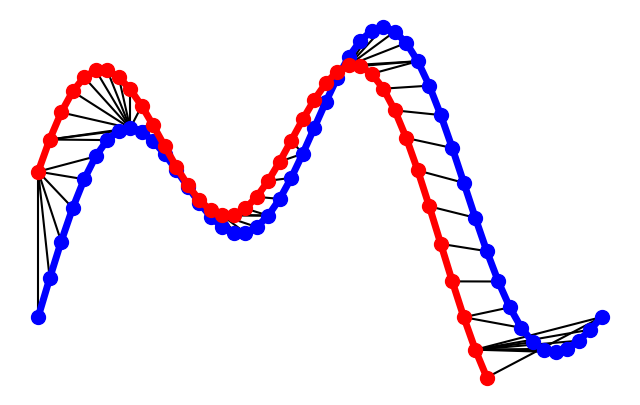

In [145]:
fig, ax = plt.subplots(figsize=(8, 5))

# Remove the border and axes ticks
fig.patch.set_visible(True)
ax.axis('off')

ax.plot([path_x, path_y], [x1[path_x], x2[path_y]], '-k')

ax.plot(x1, color='blue', marker='o', markersize=10, linewidth=5)
ax.plot(x2, color='red', marker='o', markersize=10, linewidth=5)
ax.tick_params(axis="both", which="major", labelsize=18)
